In [64]:
function nihalo(l, t, θ0, Δθ0, n)
	if (t < 0)
		throw("t must be non-negative.")
	elseif (l <= 0)
		throw("l must be positive.")
	elseif (n <= 0)
		throw("n must be positive.")
	end
	
	g = 9.80665 / l
	h = t/n
	
	ϕ = θ0
	v = Δθ0
	
	function f(pos, vel)
		return [vel, -g * sin(pos)]
	end
	
	for i in 1:n
		k1 = f(ϕ, v) * h
		k2 = f(ϕ + k1[1]/2, v + k1[2]/2) * h
		k3 = f(ϕ + k2[1]/2, v + k2[2]/2) * h
		k4 = f(ϕ + k3[1],   v + k3[2]) * h
		
		ϕ += (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
		v += (k1[2] + 2*k2[2] + 2*k3[2] + k4[2]) / 6
	end
	
	return ϕ
end

function nihalo_path(l, t, θ0, Δθ0, n)
	if (t < 0)
		throw("t must be positive.")
	elseif (l <= 0)
		throw("l must be positive.")
	elseif (n <= 0)
		throw("n must be positive.")
	end
	
	g = 9.80665 / l
	h = t/n
	
	ϕ = θ0
	v = Δθ0
	
	x = zeros(n+1)
	y = zeros(n+1)
	x[1] = 0
	y[1] = ϕ
	
	function f(pos, vel)
		return [vel, -g * sin(pos)]
	end
	
	for i in 1:n
		k1 = f(ϕ, v) * h
		k2 = f(ϕ + k1[1]/2, v + k1[2]/2) * h
		k3 = f(ϕ + k2[1]/2, v + k2[2]/2) * h
		k4 = f(ϕ + k3[1],   v + k3[2]) * h
		
		ϕ += (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
		v += (k1[2] + 2*k2[2] + 2*k3[2] + k4[2]) / 6
		
		x[i+1] = h*i
		y[i+1] = ϕ
	end
	
	return (x, y)
end

nihalo_path (generic function with 1 method)

$$ \varphi(0) = \varphi_0 $$
$$ \varphi'(0) = \varphi'_0 $$

$$ \frac{g}{l} sin(\varphi(t)) + \varphi''(t) = 0 $$

$$ \varphi''(t) = -\frac{g}{l} sin(\varphi(t)) $$


In [65]:
t = 10
l = 1.2
pos_0 = pi/2

x, y = nihalo_path(l, t, pos_0, 0, t*1000);
Y = nihalo(l, t, pos_0, 0, t*1000);

show(x[1:3])
print(' ')
show(x[end-3:end])

println()

show(y[1:3])
print(' ')
show(y[end-3:end])



[0.0, 0.001, 0.002] [9.997, 9.998, 9.999, 10.0]
[1.5707963267948966, 1.57079224069073, 1.57077998237823] [0.9870864724534245, 0.9900843585581501, 0.9930754121138248, 0.9960596197408281]

In [7]:
t = 10
X = nihalo(1.2, t, pi/2, 0, t*1000)
x, y = nihalo_path(1.2, t, pi/2, 0, t*1000)

show(X)
println()
show(y[end])

0.9960596197408281
0.9960596197408281

In [ ]:
using Plots

plot(x, y * 180/pi)
plot!(x, sin.(x) .* 180/pi, label="sin")


In [66]:
using Plots

t = 10

x, y = nihalo(1, t, pi/2, 0, t*1000);
p = plot(x, sin.(x) .* 180/pi)

for l in 1:0.2:4
	x, y = nihalo(l, t, pi/2, 0, t*1000);
	plot!(p, x, y * 180/pi)
end

plot(p, leg=false)

BoundsError: BoundsError: attempt to access Float64 at index [2]

Starting position: 90.0°
Final position after 10 seconds: 57.07001235455511°


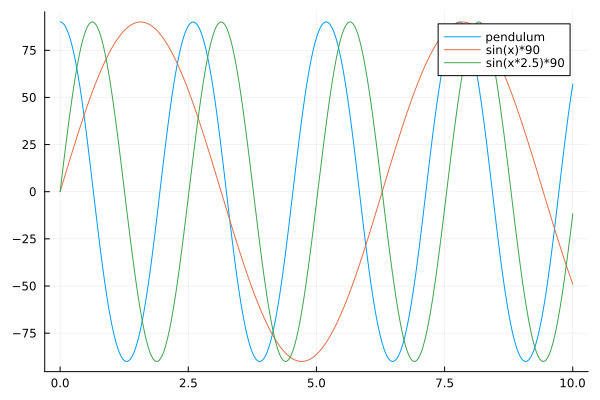

In [61]:
# using Domaca03
using Plots
using Printf


t = 10
l = 1.2
pos_0 = pi/2

print("Starting position: ")
print(pos_0 * 180/pi)
println("°")

x, y = nihalo_path(l, t, pos_0, 0, t*1000);
# Y = nihalo(l, t, pos_0, 0, t*1000);	# Y == y[end]

@printf "Final position after %g seconds: " t;
print(y[end] * 180/pi)
println("°")

plot(x, y * 180/pi, label="pendulum", legend=:topright)
plot!(x, sin.(x) * 90, label="sin(x)*90")
plot!(x, sin.(x * 2.5) * 90, label="sin(x*2.5)*90")


